In [16]:
import pandas as pd


country_vaccinations_path = 'data/country_vaccinations.csv'
daily_covid_info_path = 'data/daily_covid_info.csv'

country_vaccinations = pd.read_csv(country_vaccinations_path)
daily_covid_info = pd.read_csv(daily_covid_info_path)
# filter only iso code POL
country_vaccinations_pol = country_vaccinations[country_vaccinations['iso_code'] == 'USA']
seasoning_vaccinations_pl = country_vaccinations_pol.set_index('date')[['daily_vaccinations']]
seasoning_vaccinations_pl.dropna()


daily_covid_info_pol = daily_covid_info[daily_covid_info['Country_code'] == 'US']
daily_covid_info_pol.dropna()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
3881,2020-01-20,US,United States of America,AMR,1.0,1,0.0,0
5219,2020-01-25,US,United States of America,AMR,5.0,6,0.0,0
5321,2020-01-26,US,United States of America,AMR,1.0,7,0.0,0
5801,2020-01-28,US,United States of America,AMR,1.0,8,0.0,0
7139,2020-02-02,US,United States of America,AMR,1.0,9,0.0,0
...,...,...,...,...,...,...,...,...
287560,2023-04-16,US,United States of America,AMR,104057.0,103081453,1290.0,1121819
289379,2023-04-23,US,United States of America,AMR,98467.0,103179920,1198.0,1123017
290921,2023-04-30,US,United States of America,AMR,86484.0,103266404,1046.0,1124063
292740,2023-05-07,US,United States of America,AMR,77165.0,103343569,1146.0,1125209


In [17]:
country_vaccinations_pol.set_index('date', inplace=True)
daily_covid_info_pol.set_index('Date_reported', inplace=True)

In [20]:
merged_data =  country_vaccinations_pol[['daily_vaccinations']].join(daily_covid_info_pol[['New_deaths']], how='inner').dropna()

merged_data

,daily_vaccinations,New_deaths
2020-12-14,4579.0,2440.0
2020-12-15,27175.0,2037.0
2020-12-16,71420.0,1955.0
2020-12-17,121718.0,2758.0
2020-12-18,180653.0,3389.0
...,...,...
2022-03-24,156889.0,937.0
2022-03-25,149541.0,1244.0
2022-03-26,143396.0,895.0
2022-03-27,137525.0,776.0


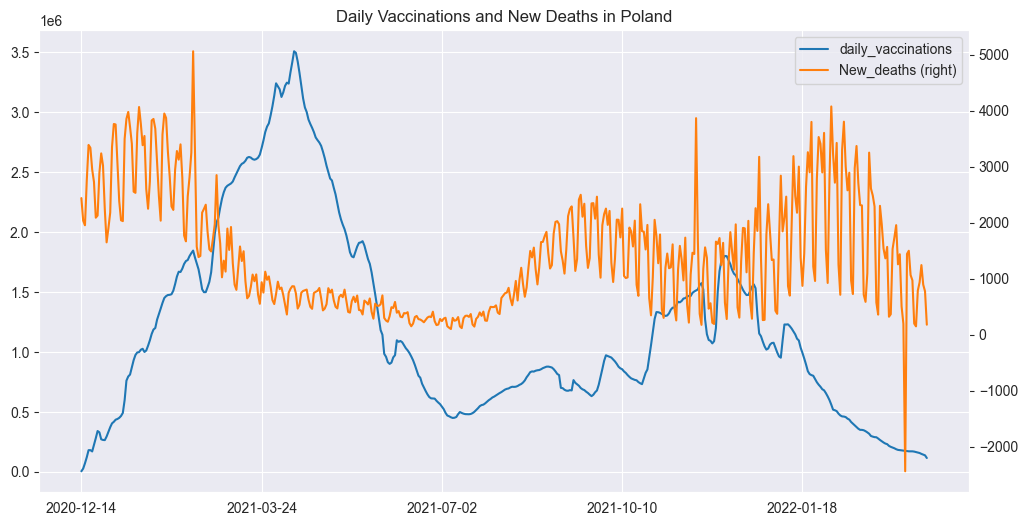

In [19]:
import matplotlib.pyplot as plt

# Wykres zmian w czasie
merged_data.plot(
    y=['daily_vaccinations', 'New_deaths'],
    secondary_y='New_deaths',
    figsize=(12, 6),
    title="Daily Vaccinations and New Deaths in Poland"
)
plt.show()

In [10]:
correlation = merged_data['daily_vaccinations'].corr(merged_data['New_deaths'])
print(f"Korelacja między liczbą szczepień a liczbą nowych zgonów: {correlation}")

Korelacja między liczbą szczepień a liczbą nowych zgonów: 0.06098954858285934
